In [30]:
import os
import mido
import pretty_midi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
midi_folder = "../data/"
bitmidi = [f for f in os.listdir(midi_folder) if f.endswith(".mid")]
midi_path = os.path.join(midi_folder, bitmidi[0])
sample1_pm = pretty_midi.PrettyMIDI(midi_path)
sample1_mido = mido.MidiFile(midi_path)

In [32]:
print(f"There are {len(sample1_mido.tracks)} tracks")
for i, track in enumerate(sample1_mido.tracks):
    print(f"Track {i + 1}: {track.name}")

There are 17 tracks
Track 1: I Want It That Way
Track 2: 
Track 3: 
Track 4: 
Track 5: 
Track 6: 
Track 7: 
Track 8: 
Track 9: 
Track 10: 
Track 11: 
Track 12: 
Track 13: 
Track 14: 
Track 15: 
Track 16: 
Track 17: 


It makes sense that there are more tracks than in MAESTRO, since each track represents an instrument. Let's compare what is inside each of there tracks (curious why only one has a name). 

In [33]:
for i, track in enumerate(sample1_mido.tracks):
    print(f"Track {i}")
    for msg in track:
        print(msg)

Track 0
MetaMessage('track_name', name='I Want It That Way', time=0)
MetaMessage('copyright', text='Copyright © 1999 by Izzet Selanik & Kim Winther', time=0)
MetaMessage('text', text='*****non commercial use only****\n', time=0)
MetaMessage('text', text='Copyright ® 1999 by Izzet Selanik & Kim Winther\n', time=0)
MetaMessage('text', text='Date: June 1999\n', time=0)
MetaMessage('text', text='Title: I Want It That Way\n', time=0)
MetaMessage('text', text='Artist: Backstreet Boys\n', time=0)
MetaMessage('text', text='Version: 2\n', time=0)
MetaMessage('midi_port', port=0, time=0)
sysex data=(126,127,9,1) time=0
sysex data=(65,16,66,18,64,0,127,0,65) time=0
sysex data=(65,16,69,18,16,1,0,31,0,0,31,4,4,4,4,0,16,16,16,16,30,0,31,31,0,0,15,9,9,9,15,0,23,20,23,16,23,0,31,31,0,0,15,8,15,8,8,0,31,2,18,18,18,0,31,16,0,0,16,16,16,0,0,0,16,0,0,0,0,0,16,25) time=0
sysex data=(65,16,69,18,16,0,0,67,111,112,121,114,105,103,104,116,32,84,111,112,108,105,115,116,32,84,101,97,109,44,32,70,111,120,77,117

In [34]:
messages = []
for i, track in enumerate(sample1_mido.tracks):
    for msg in track:
        messages.append(msg.dict())
messages = pd.DataFrame(messages)
print(messages.shape)
print(messages.type.value_counts())
print(messages[messages.velocity > 0].note.value_counts())
print(messages.control.value_counts())
print(messages.channel.value_counts())


(13337, 19)
type
note_on           11950
pitchwheel          832
control_change      458
midi_port            18
track_name           17
end_of_track         17
program_change       16
marker               11
text                  6
set_tempo             5
sysex                 4
copyright             1
time_signature        1
key_signature         1
Name: count, dtype: int64
note
54.0     913
69.0     552
42.0     458
57.0     352
61.0     295
59.0     273
56.0     249
66.0     246
64.0     229
52.0     223
49.0     214
35.0     174
62.0     142
71.0     137
37.0     129
63.0     122
39.0     122
50.0     111
28.0     104
73.0     103
30.0     102
51.0      81
68.0      71
46.0      63
78.0      54
38.0      53
75.0      53
58.0      46
76.0      31
70.0      28
32.0      26
83.0      19
33.0      18
81.0      16
45.0      15
85.0      15
74.0      15
93.0      13
29.0      12
80.0      10
90.0      10
97.0      10
82.0       8
86.0       7
92.0       6
72.0       5
40.0       5
95.0 

In [35]:
messages[messages["type"]=="note_on"].head(10)

,type,name,time,text,port,data,numerator,denominator,clocks_per_click,notated_32nd_notes_per_beat,key,tempo,program,channel,control,value,note,velocity,pitch
42,note_on,NaN,10174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,100.0,69.0,NaN
43,note_on,NaN,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,100.0,0.0,NaN
44,note_on,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,98.0,69.0,NaN
45,note_on,NaN,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,98.0,0.0,NaN
46,note_on,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,97.0,69.0,NaN
47,note_on,NaN,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,97.0,0.0,NaN
48,note_on,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,95.0,69.0,NaN
49,note_on,NaN,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,95.0,0.0,NaN
50,note_on,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,93.0,69.0,NaN
51,note_on,NaN,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,93.0,0.0,NaN


In [36]:
tempo = sample1_pm.estimate_tempo()
total_notes = sum(len(i.notes) for i in sample1_pm.instruments if not i.is_drum)
pitch_range = max(note.pitch for i in sample1_pm.instruments for note in i.notes) - \
                min(note.pitch for i in sample1_pm.instruments for note in i.notes)
print(f"Tempo={tempo}, total number of notes:{total_notes}, pitch range: {pitch_range}")

Tempo=213.23063063085988, total number of notes:3885, pitch range: 74


In [37]:
print(sample1_pm.instruments)

[Instrument(program=1, is_drum=False, name=""), Instrument(program=33, is_drum=False, name=""), Instrument(program=18, is_drum=False, name=""), Instrument(program=68, is_drum=False, name=""), Instrument(program=25, is_drum=False, name=""), Instrument(program=25, is_drum=False, name=""), Instrument(program=54, is_drum=False, name=""), Instrument(program=27, is_drum=False, name=""), Instrument(program=74, is_drum=False, name=""), Instrument(program=0, is_drum=True, name=""), Instrument(program=119, is_drum=False, name=""), Instrument(program=89, is_drum=False, name=""), Instrument(program=49, is_drum=False, name=""), Instrument(program=127, is_drum=False, name=""), Instrument(program=27, is_drum=False, name=""), Instrument(program=124, is_drum=False, name="")]


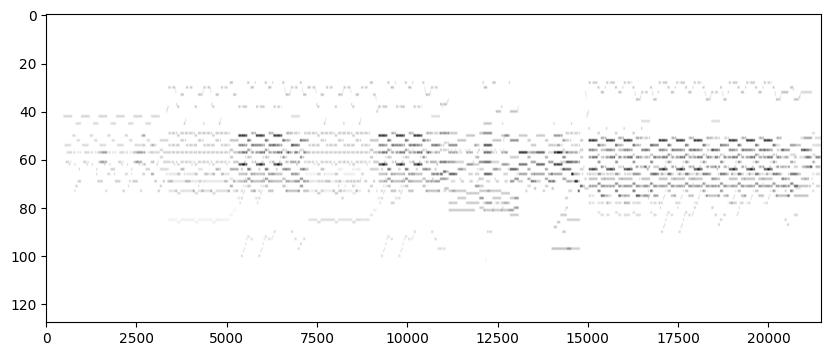

In [38]:
piano_roll = sample1_pm.get_piano_roll()

plt.figure(figsize=(10, 4))
plt.imshow(piano_roll, aspect='auto', cmap='binary')
plt.show()

Let's see what the data looks like for a different song - Super Mario 64

In [39]:
midi_path = os.path.join(midi_folder, bitmidi[6])
mario_pm = pretty_midi.PrettyMIDI(midi_path)
mario_mido = mido.MidiFile(midi_path)
print(f"There are {len(mario_mido.tracks)} tracks")
for i, track in enumerate(mario_mido.tracks):
    print(f"Track {i + 1}: {track.name}")

There are 14 tracks
Track 1: 
Track 2: SAW WAVE
Track 3: SYNBRASS 1
Track 4: SYNBRASS 1
Track 5: CHURCH ORG
Track 6: SYN STR 1
Track 7: POLYSYNTH
Track 8: PICK BASS
Track 9: OVERDRIVE
Track 10: BOWEDGLASS
Track 11: DRUMS
Track 12: DISTORTION
Track 13: +EXPLOSION
Track 14: GS/RESET


In [40]:
for i, track in enumerate(mario_mido.tracks):
    print(f"Track {i}")
    for msg in track:
        print(msg)

Track 0
MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0)
MetaMessage('set_tempo', tempo=508470, time=0)
MetaMessage('end_of_track', time=248832)
Track 1
MetaMessage('track_name', name='SAW WAVE', time=0)
program_change channel=0 program=81 time=1536
control_change channel=0 control=7 value=127 time=0
control_change channel=0 control=91 value=127 time=608
control_change channel=0 control=93 value=30 time=6
control_change channel=0 control=7 value=127 time=684
program_change channel=0 program=81 time=70
note_on channel=0 note=66 velocity=127 time=63706
note_off channel=0 note=66 velocity=0 time=78
note_on channel=0 note=66 velocity=127 time=136
note_off channel=0 note=66 velocity=0 time=286
note_on channel=0 note=68 velocity=127 time=0
note_off channel=0 note=68 velocity=0 time=288
note_on channel=0 note=69 velocity=127 time=6
note_off channel=0 note=69 velocity=0 time=176
note_on channel=0 note=66 velocity=127 time=10


In [41]:
messages = []
for i, track in enumerate(mario_mido.tracks):
    for msg in track:
        messages.append(msg.dict())
messages = pd.DataFrame(messages)
print(messages.shape)
print(messages.type.value_counts())
print(messages.control.value_counts())
print(messages[messages.velocity > 0].note.value_counts())
print(messages.channel.value_counts())
messages.head(10)

(12042, 16)
type
note_on           5687
note_off          5687
pitchwheel         397
control_change     214
program_change      27
end_of_track        14
track_name          13
time_signature       1
set_tempo            1
sysex                1
Name: count, dtype: int64
control
7.0      154
1.0       26
91.0      11
93.0       9
6.0        4
101.0      2
100.0      2
99.0       2
98.0       2
0.0        2
Name: count, dtype: int64
note
36.0    722
38.0    638
46.0    494
30.0    328
71.0    250
73.0    247
69.0    246
66.0    234
74.0    211
42.0    211
40.0    209
35.0    194
47.0    193
68.0    182
28.0    175
49.0    145
37.0    134
50.0    109
33.0    105
45.0     99
64.0     92
57.0     71
76.0     54
78.0     52
32.0     50
44.0     47
59.0     47
62.0     45
52.0     36
61.0     27
24.0     23
43.0     21
67.0     20
81.0     10
31.0     10
79.0     10
48.0      9
65.0      9
77.0      8
41.0      4
54.0      4
55.0      4
39.0      1
Name: count, dtype: int64
channel
9.0     

,type,numerator,denominator,clocks_per_click,notated_32nd_notes_per_beat,time,tempo,name,program,channel,control,value,note,velocity,pitch,data
0,time_signature,4.0,4.0,24.0,8.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,set_tempo,NaN,NaN,NaN,NaN,0,508470.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,end_of_track,NaN,NaN,NaN,NaN,248832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,track_name,NaN,NaN,NaN,NaN,0,NaN,SAW WAVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,program_change,NaN,NaN,NaN,NaN,1536,NaN,NaN,81.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,control_change,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0.0,7.0,127.0,NaN,NaN,NaN,NaN
6,control_change,NaN,NaN,NaN,NaN,608,NaN,NaN,NaN,0.0,91.0,127.0,NaN,NaN,NaN,NaN
7,control_change,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,0.0,93.0,30.0,NaN,NaN,NaN,NaN
8,control_change,NaN,NaN,NaN,NaN,684,NaN,NaN,NaN,0.0,7.0,127.0,NaN,NaN,NaN,NaN
9,program_change,NaN,NaN,NaN,NaN,70,NaN,NaN,81.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
tempo = mario_pm.estimate_tempo()
total_notes = sum(len(i.notes) for i in mario_pm.instruments if not i.is_drum)
pitch_range = max(note.pitch for i in mario_pm.instruments for note in i.notes) - \
                min(note.pitch for i in mario_pm.instruments for note in i.notes)
print(f"Tempo={tempo}, total number of notes:{total_notes}, pitch range: {pitch_range}")

Tempo=231.58651849469885, total number of notes:4124, pitch range: 57


In [43]:
print(mario_pm.instruments)

[Instrument(program=81, is_drum=False, name="SAW WAVE"), Instrument(program=62, is_drum=False, name="SYNBRASS 1"), Instrument(program=62, is_drum=False, name="SYNBRASS 1"), Instrument(program=119, is_drum=False, name="SYNBRASS 1"), Instrument(program=19, is_drum=False, name="CHURCH ORG"), Instrument(program=50, is_drum=False, name="SYN STR 1"), Instrument(program=90, is_drum=False, name="POLYSYNTH"), Instrument(program=34, is_drum=False, name="PICK BASS"), Instrument(program=29, is_drum=False, name="OVERDRIVE"), Instrument(program=92, is_drum=False, name="BOWEDGLASS"), Instrument(program=16, is_drum=True, name="DRUMS"), Instrument(program=30, is_drum=False, name="DISTORTION"), Instrument(program=127, is_drum=False, name="+EXPLOSION")]


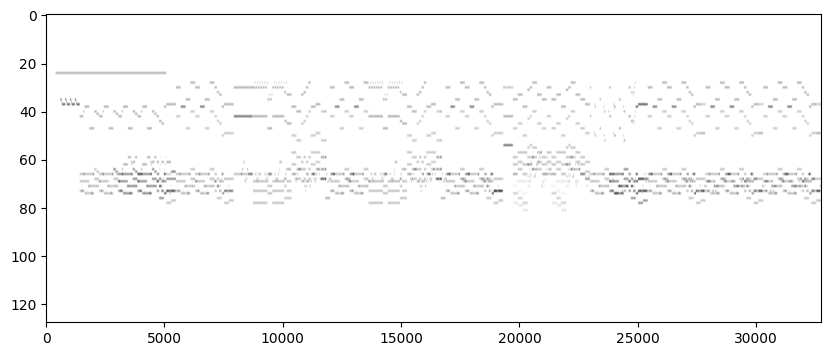

In [44]:
piano_roll = mario_pm.get_piano_roll()

plt.figure(figsize=(10, 4))
plt.imshow(piano_roll, aspect='auto', cmap='binary')
plt.show()

<Axes: xlabel='note'>

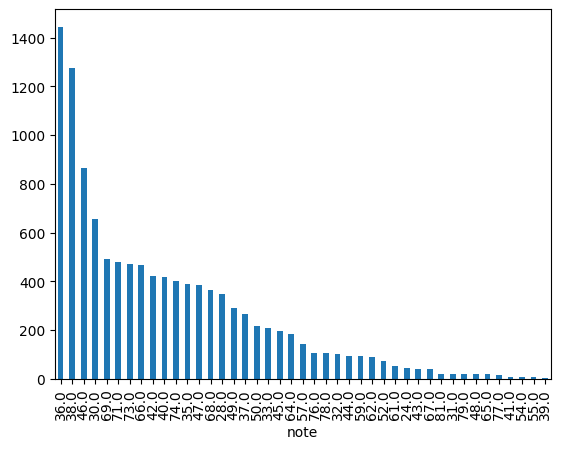

In [46]:
note_counts = messages['note'].value_counts()
note_counts.plot(kind='bar')